In [222]:
import hvplot.pandas
import pandas as pd 
import requests 
import json 
import matplotlib.pyplot as plt 
import numpy as np


In [223]:
cars = pd.read_csv('car_sales_clean.csv')
cars.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,type
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),SUV
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),SUV
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),Sedan
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),Sedan
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),Sedan


In [224]:
cars.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr             float64
sellingprice    float64
saledate         object
type             object
dtype: object

In [225]:
cars[['mmr','sellingprice']].mean()


mmr             13837.058964
sellingprice    13690.512058
dtype: float64

In [226]:
car_interior = cars.groupby("interior")[["mmr", "sellingprice"]].agg(['mean','count']).reset_index()


car_interior

interior           mmr          sellingprice        
                       mean   count          mean   count
0       beige  13419.431730   50469  13373.418455   50469
1       black  15741.820337  209865  15575.169814  209865
2        blue   8699.536532     917   8657.769902     917
3       brown  20227.992115    7102  20166.428612    7102
4    burgundy  18830.681818     154  18945.779221     154
5        gold  12078.559028     288  11856.250000     288
6        gray  11302.765437  152616  11142.409931  152616
7       green  10486.500000     200  10395.875000     200
8   off-white  29652.887324     355  29332.746479     355
9      orange  20013.306452     124  20370.564516     124
10     purple  13504.268293     287  13564.550523     287
11        red  24010.505319    1128  24221.254433    1128
12     silver  10939.271457    1002  10958.932136    1002
13        tan  12706.299870   37723  12601.495851   37723
14      white  18955.660377     212  19311.448113     212
15     yellow  17714.473684      19  18226.315789      19
16          —  13277.270884    9864  12948.230738    9864

In [227]:
car_color = cars.groupby("color")[["mmr", "sellingprice"]].agg(["mean", "count"]).reset_index()


car_color

color           mmr         sellingprice       
                       mean  count          mean  count
0       beige   9699.553332   7444   9523.642262   7444
1       black  15675.374823  93244  15474.098430  93244
2        blue  11782.792034  43060  11549.820111  43060
3       brown  15772.046789   5621  15531.780288   5621
4    burgundy  12267.702170   7605  12117.694412   7605
5    charcoal  16520.454545    429  16256.062937    429
6        gold   8745.953153   9563   8621.803514   9563
7        gray  14152.364100  70640  13956.434725  70640
8       green   8985.845787   9234   8800.623890   9234
9        lime  12008.333333     12  12737.500000     12
10  off-white  15186.716238   1244  15374.599678   1244
11     orange  13106.395349   1763  13102.091889   1763
12       pink  13380.769231     39  12414.102564     39
13     purple  12601.299213   1270  12278.033858   1270
14        red  13011.999143  37336  12897.722466  37336
15     silver  12020.602869  71251  11846.934134  71251
16  turquoise   9096.447368    190   8816.326316    190
17      white  14879.078648  89233  14863.539800  89233
18     yellow  12587.604263   1079  12781.816497   1079
19          —  17900.600417  22068  17824.400218  22068

In [228]:
interior_and_exterior = car_color.join(car_interior, lsuffix= '1')
interior_and_exterior

color          mmr1        sellingprice1          interior  \
                       mean  count          mean  count              
0       beige   9699.553332   7444   9523.642262   7444      beige   
1       black  15675.374823  93244  15474.098430  93244      black   
2        blue  11782.792034  43060  11549.820111  43060       blue   
3       brown  15772.046789   5621  15531.780288   5621      brown   
4    burgundy  12267.702170   7605  12117.694412   7605   burgundy   
5    charcoal  16520.454545    429  16256.062937    429       gold   
6        gold   8745.953153   9563   8621.803514   9563       gray   
7        gray  14152.364100  70640  13956.434725  70640      green   
8       green   8985.845787   9234   8800.623890   9234  off-white   
9        lime  12008.333333     12  12737.500000     12     orange   
10  off-white  15186.716238   1244  15374.599678   1244     purple   
11     orange  13106.395349   1763  13102.091889   1763        red   
12       pink  13380.769231     39  12414.102564     39     silver   
13     purple  12601.299213   1270  12278.033858   1270        tan   
14        red  13011.999143  37336  12897.722466  37336      white   
15     silver  12020.602869  71251  11846.934134  71251     yellow   
16  turquoise   9096.447368    190   8816.326316    190          —   
17      white  14879.078648  89233  14863.539800  89233        NaN   
18     yellow  12587.604263   1079  12781.816497   1079        NaN   
19          —  17900.600417  22068  17824.400218  22068        NaN   

             mmr            sellingprice            
            mean     count          mean     count  
0   13419.431730   50469.0  13373.418455   50469.0  
1   15741.820337  209865.0  15575.169814  209865.0  
2    8699.536532     917.0   8657.769902     917.0  
3   20227.992115    7102.0  20166.428612    7102.0  
4   18830.681818     154.0  18945.779221     154.0  
5   12078.559028     288.0  11856.250000     288.0  
6   11302.765437  152616.0  11142.409931  152616.0  
7   10486.500000     200.0  10395.875000     200.0  
8   29652.887324     355.0  29332.746479     355.0  
9   20013.306452     124.0  20370.564516     124.0  
10  13504.268293     287.0  13564.550523     287.0  
11  24010.505319    1128.0  24221.254433    1128.0  
12  10939.271457    1002.0  10958.932136    1002.0  
13  12706.299870   37723.0  12601.495851   37723.0  
14  18955.660377     212.0  19311.448113     212.0  
15  17714.473684      19.0  18226.315789      19.0  
16  13277.270884    9864.0  12948.230738    9864.0  
17           NaN       NaN           NaN       NaN  
18           NaN       NaN           NaN       NaN  
19           NaN       NaN           NaN       NaN

In [229]:
car_ma = cars.groupby("interior")[["sellingprice"]].count().reset_index()


car_ma

,interior,sellingprice
0,beige,50469
1,black,209865
2,blue,917
3,brown,7102
4,burgundy,154
5,gold,288
6,gray,152616
7,green,200
8,off-white,355
9,orange,124


In [230]:
car_max = cars.groupby("interior")["mmr"].mean().reset_index()


car_max

,interior,mmr
0,beige,13419.431730
1,black,15741.820337
2,blue,8699.536532
3,brown,20227.992115
4,burgundy,18830.681818
5,gold,12078.559028
6,gray,11302.765437
7,green,10486.500000
8,off-white,29652.887324
9,orange,20013.306452


In [231]:
bins = [0, 25000, 50000, 75000, 100000, 100000000000000000]
bin_labels = ["0-25000","25000-50000","50000-75000", "75000-100000", ">100000"]

cars_copy = cars.copy()

cars_copy["odometer ranges"] = pd.cut(cars_copy["odometer"], bins, labels= bin_labels, include_lowest= True)

cars_copy = cars_copy.sort_values(by= "odometer ranges", ascending= True)

cars_copy


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,type,odometer ranges
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),SUV,0-25000
212959,2011,BMW,3 Series,328i xDrive,Sedan,automatic,wbapk7g52bnn77473,wi,4.0,22294.0,gray,black,financial services remarketing (lease),20700.0,21750.0,Wed Feb 11 2015 02:00:00 GMT-0800 (PST),Sedan,0-25000
212973,2011,BMW,3 Series,335i,Convertible,automatic,wbadx7c59be743840,wi,44.0,21186.0,—,black,financial services remarketing (lease),28800.0,32750.0,Wed Feb 11 2015 02:00:00 GMT-0800 (PST),Convertible,0-25000
212975,2011,Cadillac,CTS,Base,Sedan,automatic,1g6da5ey6b0147357,tx,42.0,24632.0,white,—,remarketing services of el paso,18400.0,18700.0,Thu Feb 05 2015 04:00:00 GMT-0800 (PST),Sedan,0-25000
212976,2011,Cadillac,CTS-V Coupe,Base,CTS-V Coupe,automatic,1g6dv1epxb0164201,fl,38.0,15456.0,charcoal,black,bradenton motors,38200.0,39600.0,Thu Feb 05 2015 01:40:00 GMT-0800 (PST),Coupe,0-25000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115423,2008,Ford,F-450 Super Duty,XL,Crew Cab,automatic,1ftxw43r98ea03427,fl,32.0,151001.0,black,brown,r & b car sales inc,21200.0,18600.0,Thu Jan 22 2015 01:45:00 GMT-0800 (PST),Truck,>100000
115424,2008,GMC,Acadia,SLE-1,SUV,automatic,1gker13748j164016,sc,2.0,197173.0,white,gray,dab auto world & leasing,5275.0,6000.0,Thu Jan 15 2015 02:00:00 GMT-0800 (PST),SUV,>100000
297701,2005,Chevrolet,Malibu,LT,Sedan,automatic,1g1zu54885f146524,tn,28.0,170042.0,gray,gray,wholesale inc # 2,2150.0,2800.0,Wed Feb 25 2015 02:30:00 GMT-0800 (PST),Sedan,>100000
297695,2005,Chrysler,300,C,Sedan,automatic,2c3ja63h65h601877,il,19.0,131544.0,white,tan,chrysler capital,5325.0,4400.0,Tue Feb 24 2015 02:00:00 GMT-0800 (PST),Sedan,>100000


ranges_data = cars_copy.groupby("")

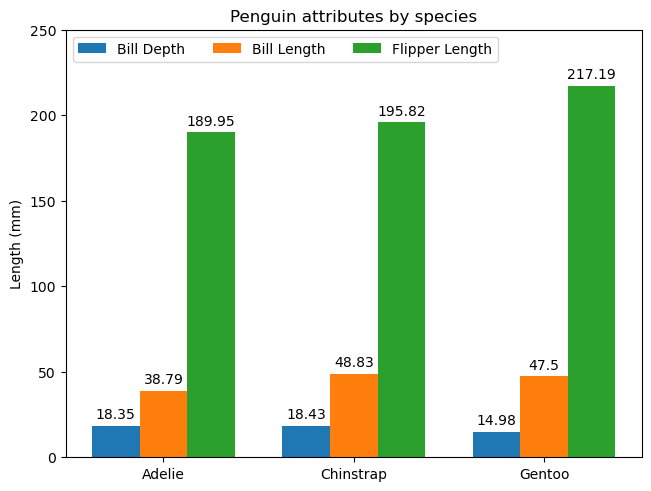

In [232]:
# data from https://allisonhorst.github.io/palmerpenguins/

import matplotlib.pyplot as plt
import numpy as np

species = ("Adelie", "Chinstrap", "Gentoo")
penguin_means = {
    'Bill Depth': (18.35, 18.43, 14.98),
    'Bill Length': (38.79, 48.83, 47.50),
    'Flipper Length': (189.95, 195.82, 217.19),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 250)

plt.show()

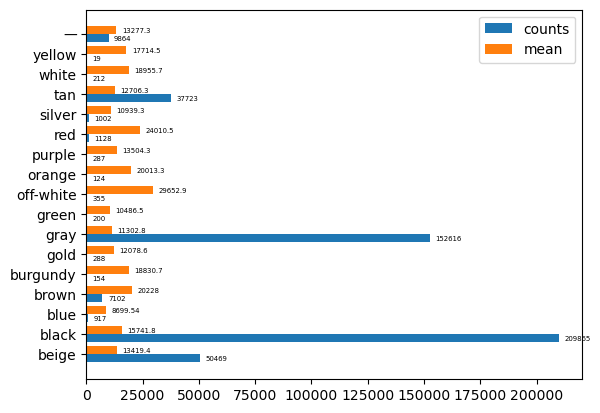

In [233]:


brands =car_ma["interior"]

h = np.arange(len(car_ma["interior"]))
w = 0.40
fig,ax = plt.subplots()

# for 


b1 = ax.barh(h - w / 2, car_ma["sellingprice"], w)
b2 = ax.barh(h + w / 2, car_max["mmr"], w)

ax.set_yticks(h)
ax.set_yticklabels(brands)
ax.legend(["counts", "mean"])
ax.bar_label(b1, padding= 4, fontsize = 5)
ax.bar_label(b2, padding = 4, fontsize = 5)
plt.show()

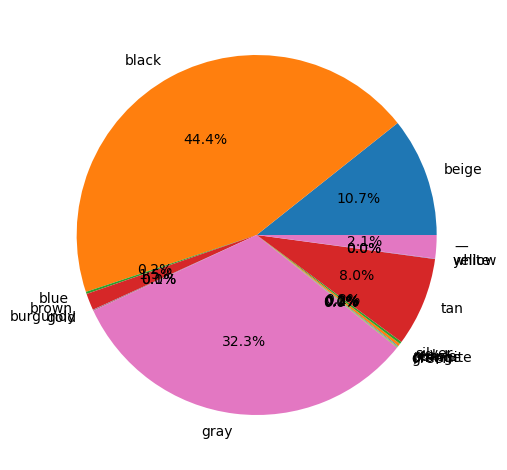

In [234]:
# plt.barh(car_max["interior"], car_max["mmr"])
# plt.show()
plt.pie(car_ma['sellingprice'], labels= car_ma['interior'], autopct= "%1.1f%%")
plt.tight_layout()
plt.show()

In [235]:
list = []

odo = cars["odometer"]
for numbers in odo:
    list.append(numbers)

# lists = pd.DataFrame(list)
# quant = lists.quantile([0.25,0.5,0.75])
# low = quant[0.25]
# high = quant[0.75]
# IQR = high - low
# lowb = low - 1.5*IQR
# highb = high - 1.5*IQR

# outlier = lists[lists  > highb]
# out.append(outlier)

# out
list
                    

[16639.0,
 9393.0,
 1331.0,
 14282.0,
 2641.0,
 5554.0,
 14943.0,
 28617.0,
 9557.0,
 4809.0,
 14414.0,
 2034.0,
 5559.0,
 14634.0,
 11398.0,
 7983.0,
 13441.0,
 8819.0,
 14538.0,
 25969.0,
 5826.0,
 10736.0,
 16506.0,
 12725.0,
 11874.0,
 37888.0,
 9606.0,
 13757.0,
 5875.0,
 12862.0,
 11426.0,
 111.0,
 16360.0,
 9027.0,
 4436.0,
 13205.0,
 11846.0,
 379.0,
 12242.0,
 40661.0,
 9051.0,
 13878.0,
 10906.0,
 7305.0,
 4314.0,
 5304.0,
 10357.0,
 6105.0,
 7770.0,
 5214.0,
 7766.0,
 9684.0,
 31.0,
 1608.0,
 9914.0,
 7879.0,
 14176.0,
 17594.0,
 1906.0,
 8037.0,
 5773.0,
 32918.0,
 19689.0,
 20595.0,
 13623.0,
 9837.0,
 13606.0,
 37752.0,
 9161.0,
 11001.0,
 14599.0,
 13386.0,
 15161.0,
 3996.0,
 10551.0,
 18152.0,
 13452.0,
 37938.0,
 39623.0,
 16348.0,
 3367.0,
 21523.0,
 4205.0,
 8891.0,
 8154.0,
 6726.0,
 36771.0,
 9552.0,
 10673.0,
 14806.0,
 7924.0,
 12752.0,
 19499.0,
 6759.0,
 12292.0,
 15727.0,
 13711.0,
 8683.0,
 4503.0,
 7800.0,
 9685.0,
 10615.0,
 13031.0,
 12905.0,
 16611.0,
 1

In [236]:
# out = []


# quant = cars["odometer"].quantile([0.25,0.5,0.75])
# low = quant.loc[0.25]
# high = quant.loc[0.75]
# IQR = high - low
# lowb = low - 1.5*IQR
# highb = high + 1.5*IQR

# outlier = cars.loc[(cars["odometer"] < lowb) | (cars["odometer"]> highb)]

# out.append(outlier)

# outer = pd.DataFrame(out)

In [237]:
# better = cars.loc[cars["odometer"] != out.values]
# better



<function matplotlib.pyplot.show(close=None, block=None)>

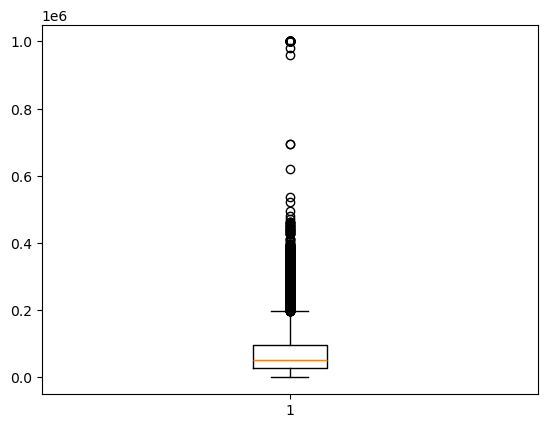

In [238]:
plt.boxplot(list)
plt.show

In [239]:
cars.head()


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,type
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),SUV
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),SUV
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),Sedan
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),Sedan
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),Sedan


In [240]:
# othercars = pd.read_csv('/Users/librarypc/Downloads/archive (2).zip')
# othercars

In [241]:
# Nathan: Are there any correlations between car features and sales performance?
# Regression between car features and sales count in the same model of car.


